<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Statistika_v_Python/Dispersionnyj_analiz_i_vidy_oshibok._AB_testy/DZ_Kondratev_STPY-48_AB_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [71]:
 # Подгрузим пакеты
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### **Задание № 1**
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

##### Решение Задания № 1

In [72]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

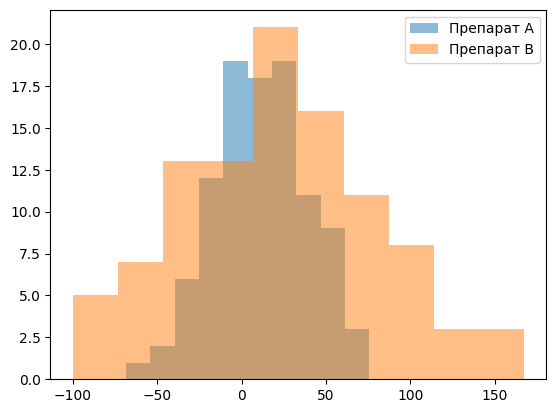

Нет различия в эффекте у этих пациентов
stat -1.733800647210997
p 0.08451003973499756


In [73]:
# Оценка различия в эффекте
stat, p = stats.ttest_ind(A, B)
alpha = 0.05

# Визуализация результатов
plt.hist(A, alpha=0.5, label='Препарат A')
plt.hist(B, alpha=0.5, label='Препарат B')
plt.legend()
plt.show()

if p < alpha:
    print('Есть различие в эффекте у этих пациентов')
else:
    print('Нет различия в эффекте у этих пациентов')

print('stat', stat)
print('p', p)

##### **Задание № 2**
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой.
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

##### Решение Задания № 2

In [74]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Напишите Ваш код для решения задачи

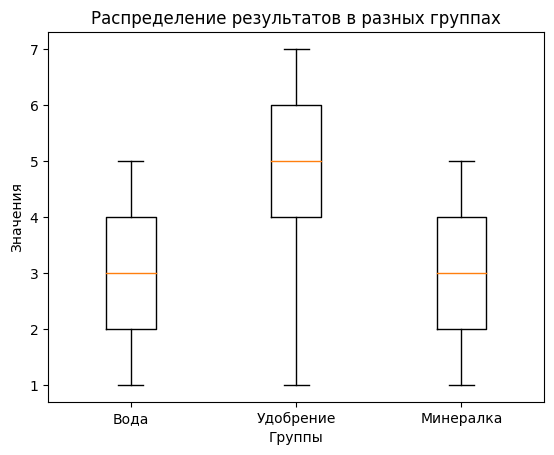

Есть эффект от удобрения по сравнению с минералкой
stat 12.525963044834192
p 2.9240047906326866e-05


In [75]:
# Дисперсионный анализ
stat, p = stats.f_oneway(water, nutri, mineral)
alpha = 0.05

# Визуализация результатов
data = [water, nutri, mineral]
labels = ['Вода', 'Удобрение', 'Минералка']

plt.boxplot(data, labels=labels)
plt.xlabel('Группы')
plt.ylabel('Значения')
plt.title('Распределение результатов в разных группах')
plt.show()

if p < alpha:
    print('Есть эффект от удобрения по сравнению с минералкой')
else:
    print('Нет эффекта от удобрения по сравнению с минералкой')

print('stat', stat)
print('p', p)

можно сделать следующие выводы:

- Значение `stat` составляет 12.53, что указывает на значительную разницу вариации между группами и внутри групп.
- Значение `p` равно 2.92e-05 или 0.00002924, что является очень маленьким значением. Это означает, что вероятность получить наблюдаемую разницу между группами случайно очень низкая, поэтому мы можем отклонить нулевую гипотезу и сделать вывод, что есть статистически значимый эффект от удобрения по сравнению с минералкой.

Для вывода более читаемого результата 0.00002924 вместо записи научной нотации 2.9240047906326866e-05, можно использовать форматирование строки с помощью метода `format` или модуля `f-string`.

### Блок 2

Cookie Cats

#### Задание № 1

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос.

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции.

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

#### Решение Задания № 1

In [76]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, on_bad_lines='skip')  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


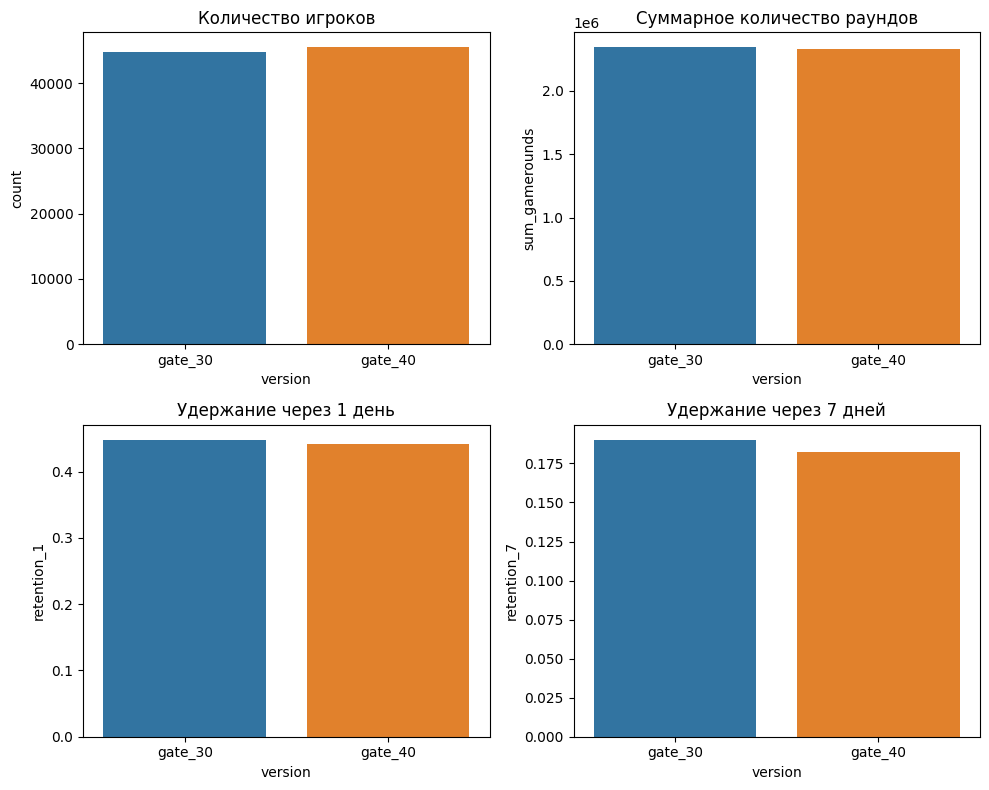

Установка ворот на 30 уровне приводит к лучшему удержанию игроков через 7 дней

Stat: 3.1644994996802778
p: 0.0015540151201088365


In [77]:
# Группировка данных по версиям игры
grouped_data = data.groupby('version').agg({
    'userid': 'count',
    'sum_gamerounds': 'sum',
    'retention_1': 'mean',
    'retention_7': 'mean'
}).rename(columns={'userid': 'count'})
# В данном коде столбцы 'retention_1' и 'retention_7' являются бинарными,
# содержащими значения True или False, представляющие соответственно удержание
# пользователя на первый и седьмой день. Вычисление среднего значения для этих столбцов
# даст нам пропорцию пользователей, которые остались на этих днях в каждой группе версий игры.

# Визуализация с помощью графиков
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Количество игроков в каждой версии
sns.barplot(x=grouped_data.index, y='count', data=grouped_data, ax=axes[0, 0])
axes[0, 0].set_title('Количество игроков')

# Количество сыгранных раундов в каждой версии
sns.barplot(x=grouped_data.index, y='sum_gamerounds', data=grouped_data, ax=axes[0, 1])
axes[0, 1].set_title('Суммарное количество раундов')

# Удержание игроков через 1 день после установки
sns.barplot(x=grouped_data.index, y='retention_1', data=grouped_data, ax=axes[1, 0])
axes[1, 0].set_title('Удержание через 1 день')

# Удержание игроков через 7 дней после установки
sns.barplot(x=grouped_data.index, y='retention_7', data=grouped_data, ax=axes[1, 1])
axes[1, 1].set_title('Удержание через 7 дней')

plt.tight_layout()
plt.show()

# Статистический тест для сравнения удержания
gate_30_retention_7 = data[data['version'] == 'gate_30']['retention_7']
gate_40_retention_7 = data[data['version'] == 'gate_40']['retention_7']

stat, p = stats.ttest_ind(gate_30_retention_7, gate_40_retention_7)


alpha = 0.05

if p < alpha:
    if stat < 0:
        print('Установка ворот на 40 уровне приводит к лучшему удержанию игроков через 7 дней')
    else:
        print('Установка ворот на 30 уровне приводит к лучшему удержанию игроков через 7 дней')
else:
    print('Нет статистически значимой разницы между установкой ворот на 30 и 40 уровне в отношении удержания игроков через 7 дней')

print('\nStat:', stat)
print('p:', p)


выводы:

1. Количество игроков: Версия `gate_40` имеет незначительное преимущество в количестве игроков, но разница невелика.

2. Суммарное количество раундов: Версии игры имеют примерно одинаковое количество сыгранных раундов, разница незначительна.

3. Удержание через 1 день: Удержание игроков через 1 день после установки версии `gate_30` немного выше, чем у версии `gate_40`.

4. Удержание через 7 дней: Удержание игроков через 7 дней после установки версии `gate_30` также немного выше, чем у версии `gate_40`.

Проведенный `t-тест` показал значимую разницу между установкой ворот на 30 и 40 уровне в отношении удержания игроков через 7 дней. Установка ворот на 30 уровне оказывает более положительное влияние на удержание игроков, чем установка на 40 уровне. Это означает, что рассмотрение ворот на более низком уровне может быть перспективным для повышения ретенции игроков.

### Блок 3
#### Покемоны и A/B-тестирование

##### **Задание № 1**

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**


    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

##### Решение Задания № 1

In [78]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, on_bad_lines='skip')
pokemon

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [79]:
# Фильтрация по условиям "Class 1 = Grass" и "Class 2 = NaN" или "Class 1 = Rock"
filtered_pokemon = pokemon[(pokemon['Class 1'].isin(['Grass', 'Rock'])) & (pokemon['Class 2'].isnull())]

# Отбор нужных строк
grass_pokemon = filtered_pokemon[filtered_pokemon['Class 1'] == 'Grass']['Attack']
rock_pokemon = filtered_pokemon[filtered_pokemon['Class 1'] == 'Rock']['Attack']

# Вывод статистики для переменной grass_pokemon
print('Статистика для обычной атаки покемонов из класса Grass:')
print(grass_pokemon.describe())

# Вывод статистики для переменной rock_pokemon
print('\nСтатистика для обычной атаки покемонов из класса Rock:')
print(rock_pokemon.describe())

Статистика для обычной атаки покемонов из класса Grass:
count     33.000000
mean      68.818182
std       22.302543
min       30.000000
25%       53.000000
50%       65.000000
75%       85.000000
max      110.000000
Name: Attack, dtype: float64

Статистика для обычной атаки покемонов из класса Rock:
count      9.000000
mean     103.333333
std       35.443617
min       45.000000
25%       80.000000
50%      100.000000
75%      125.000000
max      165.000000
Name: Attack, dtype: float64


Исходя из результатов статистики, имеющихся у нас, невозможно однозначно сказать, что покемоны из класса Grass имеют более сильную обычную атаку, чем покемоны из класса Rock.

Статистика показывает, что средняя обычная атака у покемонов из класса Grass равна 68.82, в то время как у покемонов из класса Rock - 103.33. Однако, стандартное отклонение также учитывает разброс данных и показывает, что у покемонов из класса Rock имеется большее стандартное отклонение (35.44), что может указывать на больший разброс значений атаки в этом классе. Таким образом, необходима дальнейшая проверка этой гипотезы с использованием статистических методов, таких как t-тест.

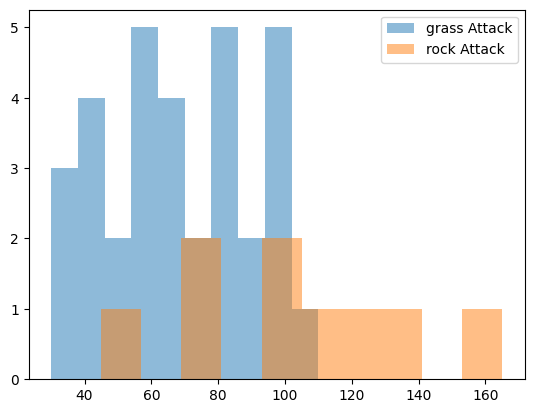

Покемоны в классе Grass имеют более слабую обычную атаку, чем покемоны в классе Rock.

Stat: -3.60232780765211
p: 0.0008620463823202559


In [80]:
# Оценка различия в атаке
stat, p = stats.ttest_ind(grass_pokemon, rock_pokemon)
alpha = 0.05
# При задании условий (if stat < 0:) и выборке для проведения t-теста, важно учитывать,
# какие данные и на каком месте стоят в строке кода. Например,
# в данном случае мы сравниваем атаку покемонов классов Grass и Rock,
# поэтому сначала указываем выборку для Grass_pokemon, а затем для Rock_pokemon.

# Визуализация результатов
plt.hist(grass_pokemon, alpha=0.5, label='grass Attack')
plt.hist(rock_pokemon, alpha=0.5, label='rock Attack')
plt.legend()
plt.show()

if p < alpha:
    if stat < 0:
        print('Покемоны в классе Grass имеют более слабую обычную атаку, чем покемоны в классе Rock.')
    else:
        print('Покемоны в классе Rock имеют более слабую обычную атаку, чем покемоны в классе Grass.')
else:
    print('Нет статистически значимых различий в обычной атаке между покемонами классов Grass и Rock.')

print('\nStat:', stat)
print('p:', p)

В результате проведенного `t-теста` выяснилось, что есть статистически значимая разница в обычной атаке между покемонами класса `Grass` и `Roc`. Значение статистики t равно -3.60232780765211, что указывает на отрицательное направление различия. Это говорит о том, что в среднем покемоны класса `Grass` имеют более слабую обычную атаку по сравнению с покемонами класса `Rock`.

#### **Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`.

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

#### Решение Задания № 2

In [81]:
# Фильтрация по условиям "Class 1 = Water" и "Class 2 = NaN" или "Class 1 = Normal"
filtered_pokemon = pokemon[(pokemon['Class 1'].isin(['Water', 'Normal'])) & (pokemon['Class 2'].isnull())]

# Отбор нужных строк
water_pokemon = filtered_pokemon[filtered_pokemon['Class 1'] == 'Water']['Speed']
normal_pokemon = filtered_pokemon[filtered_pokemon['Class 1'] == 'Normal']['Speed']

# Вывод статистики для переменной water_pokemon
print('Статистика для скорости покемонов из класса Water:')
print(water_pokemon.describe())

# Вывод статистики для переменной normal_pokemon
print('\nСтатистика для скорости покемонов из класса Normal:')
print(normal_pokemon.describe())

Статистика для скорости покемонов из класса Water:
count     59.000000
mean      67.881356
std       19.930988
min       32.000000
25%       52.000000
50%       65.000000
75%       85.000000
max      115.000000
Name: Speed, dtype: float64

Статистика для скорости покемонов из класса Normal:
count     61.000000
mean      69.459016
std       28.191946
min        5.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      120.000000
Name: Speed, dtype: float64


Распределения скорости для обоих классов не являются строго нормальными. Класс `Water` имеет меньшее стандартное отклонение (19.930988), чем класс `Normal` (28.191946). Однако, средняя скорость покемонов из класса `Norma`  (69.459016) выше, чем у покемонов из класса `Water` (67.881356).

Для проверки статистической значимости различий в средней скорости между покемонами из классов `Water` и `Normal`, необходимо провести соответствующий статистический тест. Один из возможных тестов - это `t-тест` Стьюдента для независимых выборок.

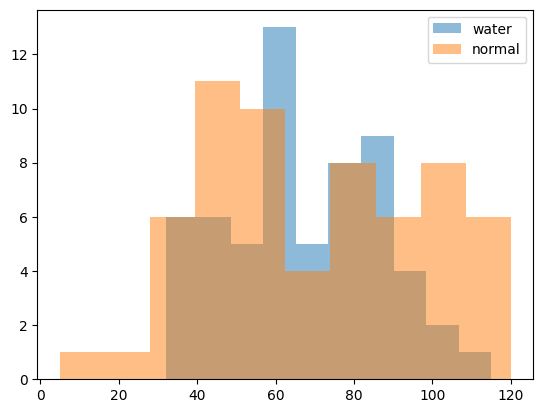

Нет статистически значимой разницы в скорости между покемонами в классе Water и покемонами в классе Normal
stat: -0.35290779696814856
p: 0.7247871854890613


In [82]:
# Оценка различия в скорости
stat, p = stats.ttest_ind(water_pokemon, normal_pokemon)
alpha = 0.05

# Визуализация результатов
plt.hist(water_pokemon, alpha=0.5, label='water')
plt.hist(normal_pokemon, alpha=0.5, label='normal')
plt.legend()
plt.show()

if p < alpha:
    if stat < 0:
        print('Покемоны в классе Water в среднем двигаются медленнее, чем покемоны в классе Normal')
    else:
        print('Покемоны в классе Water в среднем двигаются быстрее, чем покемоны в классе Normal')
else:
    print('Нет статистически значимой разницы в скорости между покемонами в классе Water и покемонами в классе Normal')

print('stat:', stat)
print('p:', p)

Исходя из результатов `t-теста`, статистика равна -0.353, что говорит о том, что покемоны в классе `Water` имеют немного меньшую среднюю скорость по сравнению с покемонами в классе `Normal`. Однако, значение p-value равно 0.725, что говорит о том, что разница не является статистически значимой. То есть, мы  не можем с уверенностью сказать, что покемоны в классе Water действительно двигаются медленнее или быстрее.

#### **Задание № 3**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона.
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`).
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

#### Решение Задания № 3

In [83]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

# Вычисляем средние скорости в выборках
mean_treathed = pokemon.loc[pokemon['Name'].isin(treathed_pokemon), 'Speed'].mean()
mean_non_treathed = pokemon.loc[~pokemon['Name'].isin(treathed_pokemon), 'Speed'].mean()

# T-Test для сравнения средних скоростей
t_statistic, p_value = stats.ttest_ind(pokemon.loc[pokemon['Name'].isin(treathed_pokemon), 'Speed'],
                                       pokemon.loc[~pokemon['Name'].isin(treathed_pokemon), 'Speed'])

# Выводим базовые статистики
print("Базовые статистики для покемонов, принявших сыворотку:")
print(pokemon.loc[pokemon['Name'].isin(treathed_pokemon), 'Speed'].describe())

print("\nБазовые статистики для остальных покемонов:")
print(pokemon.loc[~pokemon['Name'].isin(treathed_pokemon), 'Speed'].describe())

print("\nРезультаты T-теста:")
print("t-статистика:", t_statistic)
print("p-значение:", p_value)

# Сравнение средних скоростей с выводом результата
alpha = 0.05
if p_value < alpha:
    if t_statistic < 0:
        print('\nПокемоны, принявшие сыворотку, в среднем двигаются медленнее, чем остальные покемоны')
    else:
        print('\nПокемоны, принявшие сыворотку, в среднем двигаются быстрее, чем остальные покемоны')
else:
    print('\nНет статистически значимой разницы в скорости между покемонами, принявшими сыворотку, и остальными покемонами')

Базовые статистики для покемонов, принявших сыворотку:
count      4.000000
mean     145.000000
std        7.071068
min      135.000000
25%      142.500000
50%      147.500000
75%      150.000000
max      150.000000
Name: Speed, dtype: float64

Базовые статистики для остальных покемонов:
count    796.000000
mean      67.891960
std       28.614785
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64

Результаты T-теста:
t-статистика: 5.385407401082377
p-значение: 9.51510117630786e-08

Покемоны, принявшие сыворотку, в среднем двигаются быстрее, чем остальные покемоны


Результаты T-теста показывают, что t-статистика равна 5.385407401082377, а p-значение равно 0.00000010. Это означает, что p-значение значительно меньше заданного уровня значимости 0.05, что позволяет нам отвергнуть нулевую гипотезу о равенстве средних скоростей двух групп покемонов. Таким образом, можем сделать вывод, что покемоны, принявшие сыворотку, в среднем двигаются значительно быстрее, чем остальные покемоны.

#### **Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов.
Оук предложил разобраться в этом Вам.

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

#### Решение Задания № 4

In [84]:
# Выберем данные только для легендарных покемонов и других покемонов
legendary = pokemon[pokemon['Legendary'] == True]
non_legendary = pokemon[pokemon['Legendary'] == False]

# Вычислим сумму и произведение характеристик HP, Attack и Defense для каждой группы
legendary_sum = legendary['HP'] + legendary['Attack'] + legendary['Defense']
non_legendary_sum = non_legendary['HP'] + non_legendary['Attack'] + non_legendary['Defense']

legendary_prod = legendary['HP'] * legendary['Attack'] * legendary['Defense']
non_legendary_prod = non_legendary['HP'] * non_legendary['Attack'] * non_legendary['Defense']


In [85]:
# Проведем T-тест для суммы характеристик
t_statistic_sum, p_value_sum = stats.ttest_ind(legendary_sum, non_legendary_sum)

# Проведем T-тест для произведения характеристик
t_statistic_prod, p_value_prod = stats.ttest_ind(legendary_prod, non_legendary_prod)

print("Результаты T-теста для суммы характеристик:")
print("T-статистика:", t_statistic_sum)
print("p-значение:", p_value_sum)

print("\nРезультаты T-теста для произведения характеристик:")
print("T-статистика:", t_statistic_prod)
print("p-значение:", p_value_prod)

alpha = 0.05
if p_value_sum < alpha:
    if t_statistic_sum < 0:
        print('\nЛегендарные покемоны в среднем имеют меньшую сумму характеристик по сравнению с другими покемонами')
    else:
        print('\nЛегендарные покемоны в среднем имеют большую сумму характеристик по сравнению с другими покемонами')
else:
    print('\nНет статистически значимой разницы в сумме характеристик между легендарными и другими покемонами')

if p_value_prod < alpha:
    if t_statistic_prod < 0:
        print('\nЛегендарные покемоны в среднем имеют меньшее произведение характеристик по сравнению с другими покемонами')
    else:
        print('\nЛегендарные покемоны в среднем имеют большее произведение характеристик по сравнению с другими покемонами')
else:
    print('\nНет статистически значимой разницы в произведении характеристик между легендарными и другими покемонами')


# Выводим базовые статистики для суммы характеристик
print("\nБазовые статистики для суммы характеристик:")
print("Легендарные покемоны:", legendary_sum.describe())
print("\nДругие покемоны:", non_legendary_sum.describe())

# Выводим базовые статистики для произведения характеристик
print("\nБазовые статистики для произведения характеристик:")
print("Легендарные покемоны:", legendary_prod.describe())
print("\nДругие покемоны:", non_legendary_prod.describe())

Результаты T-теста для суммы характеристик:
T-статистика: 11.591852366462316
p-значение: 7.970942205722087e-29

Результаты T-теста для произведения характеристик:
T-статистика: 13.263253408231844
p-значение: 1.992664308842282e-36

Легендарные покемоны в среднем имеют большую сумму характеристик по сравнению с другими покемонами

Легендарные покемоны в среднем имеют большее произведение характеристик по сравнению с другими покемонами

Базовые статистики для суммы характеристик:
Легендарные покемоны: count     65.000000
mean     309.076923
std       46.429822
min      230.000000
25%      275.000000
50%      305.000000
75%      340.000000
max      440.000000
dtype: float64

Другие покемоны: count    735.000000
mean     214.410884
std       64.359599
min       55.000000
25%      165.000000
50%      213.000000
75%      258.000000
max      440.000000
dtype: float64

Базовые статистики для произведения характеристик:
Легендарные покемоны: count    6.500000e+01
mean     1.085942e+06
std      5

Из результатов T-теста видно, что для обоих параметров (сумма и произведение характеристик) p-значение меньше заданного уровня значимости `alpha`, что говорит о статистически значимой разнице между легендарными и другими покемонами.

Для суммы характеристик, `T-статистика` равна 11.59, что говорит о том, что легендарные покемоны в среднем имеют большую сумму характеристик по сравнению с другими покемонами.

Для произведения характеристик, `T-статистика` равна 13.26, что также указывает на то, что легендарные покемоны в среднем имеют большее произведение характеристик по сравнению с другими покемонами.

При анализе базовых статистик видно, что средняя сумма характеристик для легендарных покемонов составляет 309.08, в то время как у других покемонов она составляет 214.41. Также среднее произведение характеристик для легендарных покемонов составляет 1,085,942, в то время как у других покемонов оно составляет 425,041. Эти данные также указывают на то, что легендарные покемоны имеют более высокие значения характеристик.

Вывод: Статистические результаты и базовые статистики указывают на то, что легендарные покемоны в среднем имеют выше сумму и произведение характеристик по сравнению с другими покемонами.

#### **Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь!

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

#### Решение Задания № 5

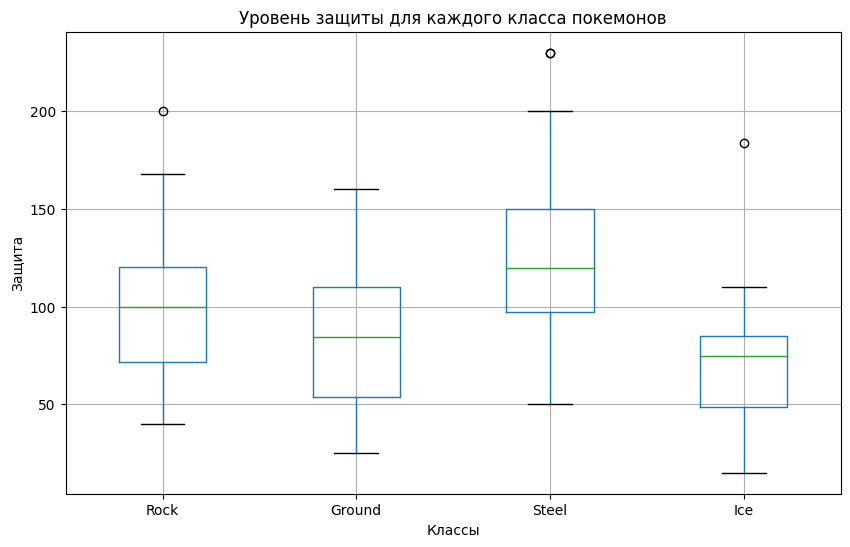

F-статистика: 10.576882027817977
p-значение: 3.0803014649204294e-06

Есть статистически значимые различия между классами по уровню защиты.


In [87]:
# Заданный массив best_defence_class
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']

# Создаем пустой список для хранения подвыборок
class_samples = []

# Создаем подвыборки для каждого класса покемонов
for class_name in best_defence_class:
    class_pokemon = pokemon.loc[pokemon['Class 1'] == class_name]
    class_samples.append(class_pokemon['Defense'])

# Создаем матрицу данных из списка подвыборок
data = pd.DataFrame(class_samples).T
data.columns = best_defence_class

# Создаем boxplot
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Уровень защиты для каждого класса покемонов')
plt.ylabel('Защита')
plt.xlabel('Классы')
plt.show()

# Проводим однофакторный ANOVA тест
f_statistic, p_value = f_oneway(*class_samples)

# Принтим значения F-статистики и p-значения
print("F-статистика:", f_statistic)
print("p-значение:", p_value)

# Интерпретация статистической значимости различий
alpha = 0.05
if p_value < alpha:
    print("\nЕсть статистически значимые различия между классами по уровню защиты.")
else:
    print("\nСтатистически значимых различий между классами по уровню защиты нет.")

Класс `Rock` и `Steel` обладают более высокими значениями уровня защиты, в то время как классы `Ground` и `Ice` имеют более низкие значения.

Значение `F-статистики` равное 10.58 говорит о том, что существуют статистически значимые различия между классами по уровню защиты.

`P-значение` (3.08e-06) является мерой статистической значимости различий. Очень низкое значение p-значения показывает, что различия между классами по уровню защиты являются статистически значимыми.

На основе этих результатов можно сделать вывод, что классы покемонов в данных имеют статистически значимые различия в уровне защиты. Это означает, что распределение силы защиты по разным классам покемонов статистически отличается.

На основе F-статистики и p-значения можно сделать вывод о наличии статистически значимых различий между классами в уровне защиты. Однако, мы не можем делать точные выводы о том, какие именно классы отличаются друг от друга без проведения дополнительного анализа.

In [88]:
# Выводим базовые статистики для уровня защиты Defense только для выбранных классов
stats = data.describe()
stats = stats.loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], best_defence_class]
print(stats)

             Rock      Ground       Steel         Ice
count   44.000000   32.000000   27.000000   24.000000
mean   100.795455   84.843750  126.370370   71.416667
std     36.447209   33.786912   44.806548   34.387708
min     40.000000   25.000000   50.000000   15.000000
25%     71.500000   53.750000   97.500000   48.750000
50%    100.000000   84.500000  120.000000   75.000000
75%    120.500000  110.000000  150.000000   85.000000
max    200.000000  160.000000  230.000000  184.000000


Вывод:
   - Класс `Rock` имеет высокий средний уровень защиты (около 100.8) и разнообразие значений от 40 до 200. Можно предположить, что покемоны этого класса обладают хорошими защитными способностями.
   - Класс `Ground` имеет ниже средний уровень защиты (около 84.8), но все же в значительной степени разнообразен, с уровнем защиты от 25 до 160. Возможно, покемоны этого класса имеют различные стили защиты и способны успешно справляться с различными видами атак.
   - Класс `Steel` имеет самый высокий средний уровень защиты (около 126.4), а также самый большой разброс значений от 50 до 230. Это может указывать на высокую степень защиты покемонов этого класса и их способность выдерживать сильные атаки.
   - Класс `Ice` имеет самый низкий средний уровень защиты (около 71.4) и относительно узкий разброс значений от 15 до 184. Это говорит о том, что покемоны этого класса имеют более уязвимую защиту, что может сказаться на их способности выжить в боях.